# Statistical Learning

## Customer Segments
## Dr. Alla Petukhina


### Name: Thi Thuy Le 
### Matrikelnummer: S0564314

### 1. Data Analysis

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as sm
from collections import Counter
from sklearn.cluster import KMeans
from pandas import DataFrame
from sklearn.cluster import AgglomerativeClustering

We need to import the necessary libraries.

### Daten Upload

We will work with the file Mall_Customers below, so we need to upload this file.

In [96]:
df = pd.read_csv('Mall_Customers.csv')


#### 1.1 Data verification


##### 1.1.1 Data

With this code we give a quick reference. And this is what the Dataframe I need to create looks like.

In [97]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


CustomerID: Unique ID assigned to the customer.\
Gender: Gender of the customer.\
Age: Age of the customer.\
Annual Income (k$): Annual Income of the customer.\
Spending Score: Score assigned by the mall based on customer behavior and spending nature.


##### 1.1.2 Infomation of Data

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##### 1.1.3 Mean, Min, Max, Median, Standard Deviation of data

In [99]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


##### 1.1.4 Check MissingValues NaN 

We can check if there are any MissingValues.

In [100]:
df.isnull()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


##### Sum of MissingValues

In [101]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no missing values.


#### 1.2 Categorical analysis and visualization

##### 1.2.1 Annual Income

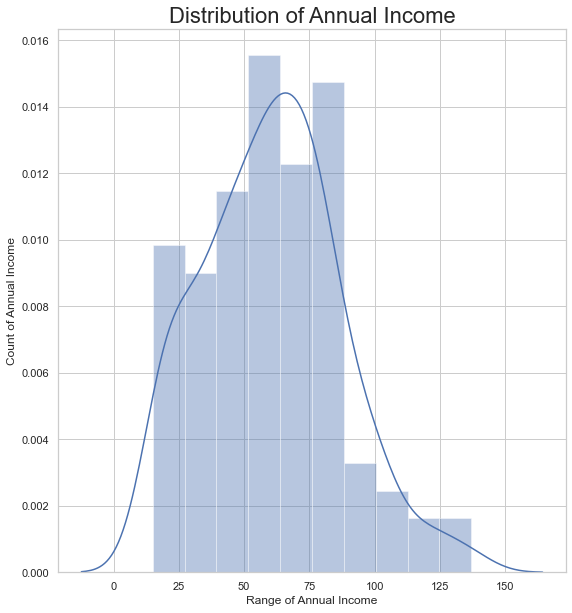

In [102]:
import warnings
warnings.filterwarnings('ignore')


fig = plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 22)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count of Annual Income')

plt.show()

The line of code shows the column and line charts.\
With length and width 20, 10 and in whitegrid style.\
Graph with x-axis as Range of Annual Income and y-axis as Count of Annual Income.
The font size is 22.\
plt.subplot (1, 2, 1) means the figure has 1 row, 2 columns.\
And this applies to all the charts below.

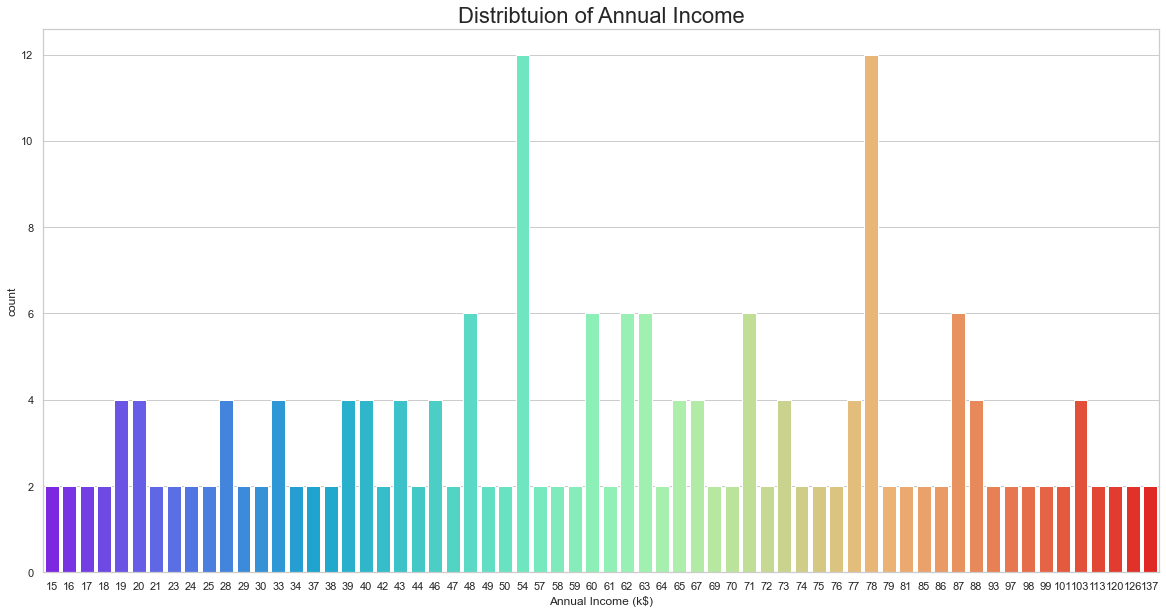

In [103]:


fig = plt.figure(figsize = (20, 10))
sns.countplot(df['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribtuion of Annual Income', fontsize = 22)

plt.show()

There are many people earning at 54(k) and 78(k).

##### 1.2.2 Age

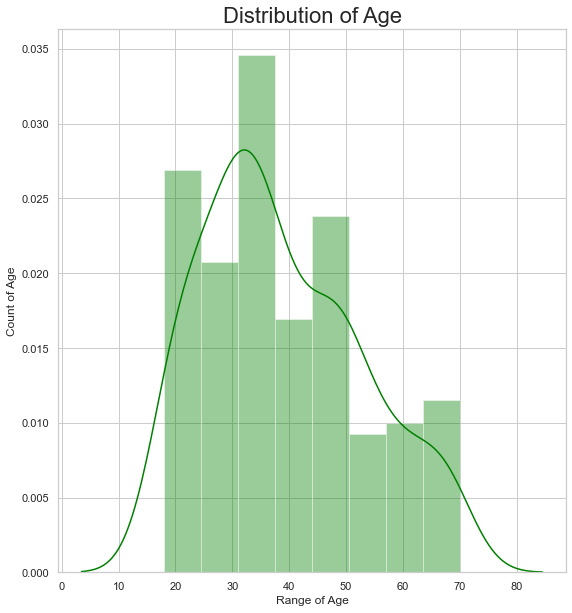

In [104]:

fig = plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Age'], color = 'green')
plt.title('Distribution of Age', fontsize = 22)
plt.xlabel('Range of Age')
plt.ylabel('Count of Age')

plt.show()

This Age parameter has a maximum value of 70 and a minimum value of 18. The maximum distribution is between 30 and 35. Through this we can also see, the majority of customers are young people.

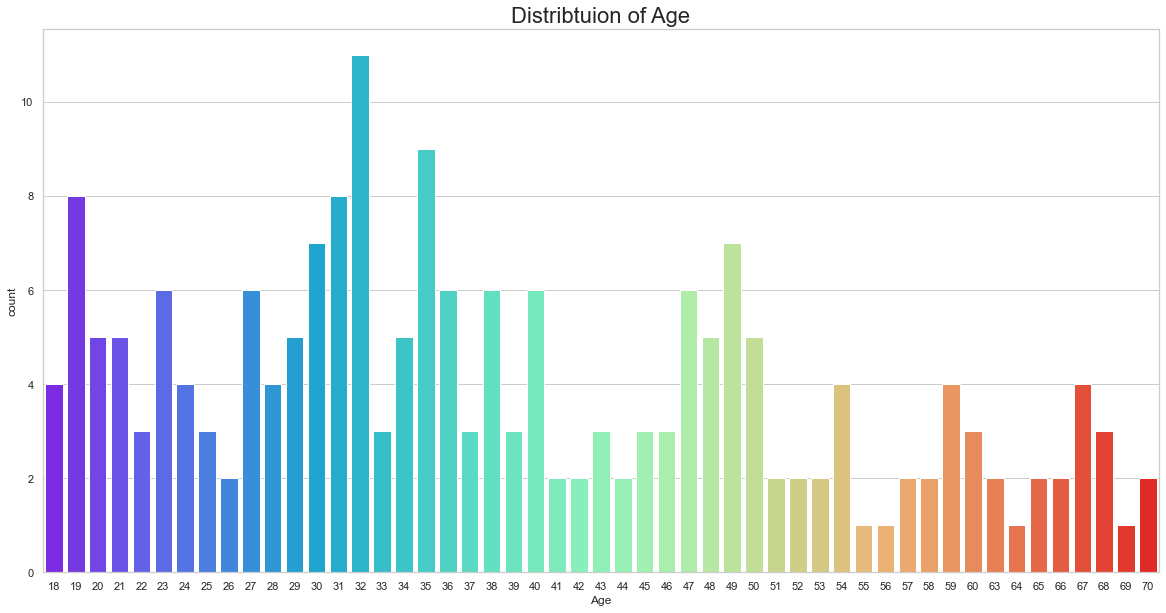

In [105]:
fig = plt.figure(figsize = (20, 10))
sns.countplot(df['Age'], palette = 'rainbow')
plt.title('Distribtuion of Age', fontsize = 22)
plt.show()


Maximum value of 70.\
Minimum value of 18.\
The maximum distribution is between 30 and 35.

##### 1.2.3 Spending Score

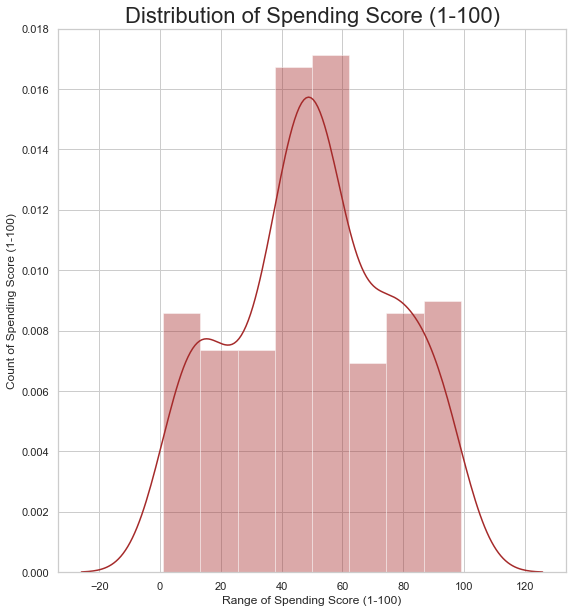

In [106]:
fig = plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Spending Score (1-100)'], color = 'brown')
plt.title('Distribution of Spending Score (1-100)', fontsize = 22)
plt.xlabel('Range of Spending Score (1-100)')
plt.ylabel('Count of Spending Score (1-100)')

plt.show()

This Spending Score parameter has a maximum value of 99 and a minimum value of 1. The maximum distribution is between 40 and 50 and average is 50,20. If we take a deep dive into the features, it is observed that spending score has 3 peaks(0-20,40-60,80-100)

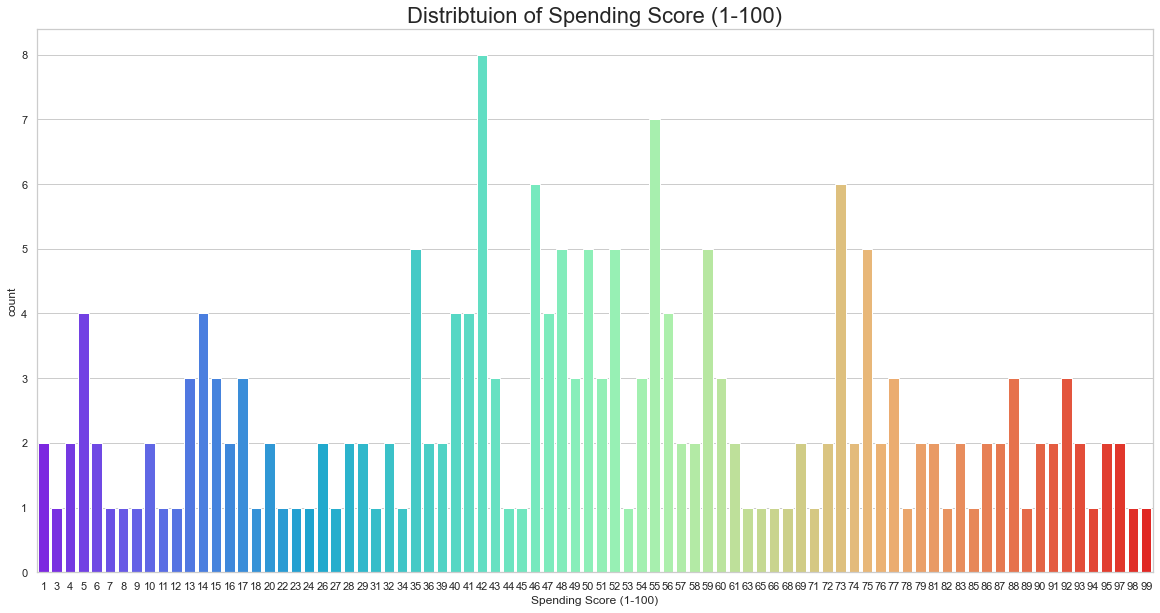

In [107]:

fig = plt.figure(figsize = (20, 10))
sns.countplot(df['Spending Score (1-100)'], palette = 'rainbow')
plt.title('Distribtuion of Spending Score (1-100)', fontsize = 22)

plt.show()

Maximum value of 99.\
Minimum value of 1.\
The maximum distribution is between 40 and 50.

##### 1.2.4 Genre

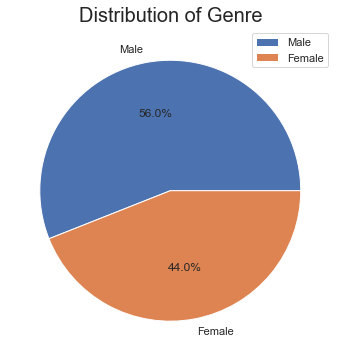

In [108]:
labels= ['Male', 'Female']
size= df['Genre'].value_counts()
plt.rcParams['figure.figsize'] = (6,6)
plt.pie(size, labels=labels,autopct='%1.1f%%')
plt.title('Distribution of Genre', fontsize = 20)
plt.legend()

We divide the Gender into 2 groups. Women make up the majority with 56% and men with 44%. In this pie chart we can easily see that women have more passion for shopping than men.

The data shows that there are more women than men.

######  Genre vs Annual Income

The line chart below compares earnings between men and women. With x-axis will be Annual Income.

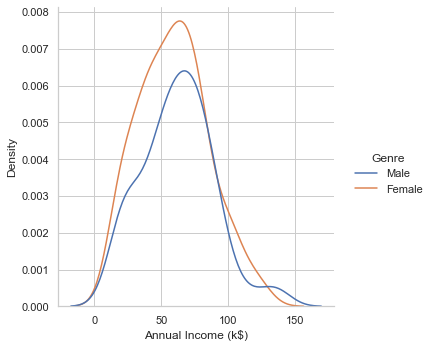

In [109]:
sns.displot(data=df, x="Annual Income (k$)",hue='Genre',kind ='kde')

######  Genre vs Age

The line chart below compares age between men and women. With x-axis will be Age.

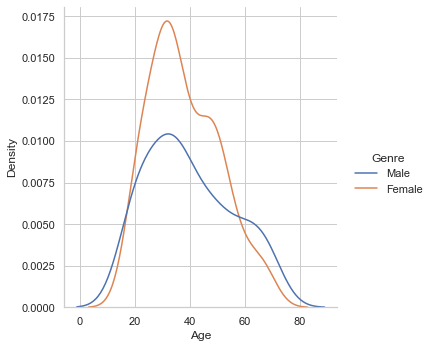

In [110]:
sns.displot(data=df, x="Age",hue='Genre',kind ='kde')

######  Genre vs Spending Score

The line chart below compares Spending Scores between men and women. With x-axis will be Spending Scores.

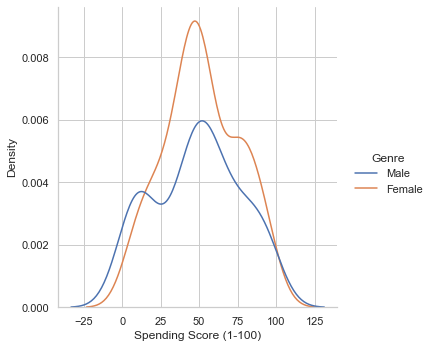

In [111]:
sns.displot(data=df, x="Spending Score (1-100)",hue='Genre',kind ='kde')

The percentage of women is higher than men in all aspects such as Annual Income, Age and Spending Score.

***Correlationen of Variables***

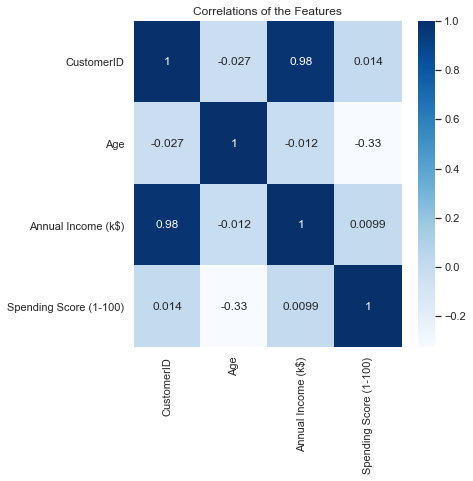

In [112]:
plt.figure(figsize=[6,6])
plt.title('Correlations of the Features')
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap="Blues")
plt.show()

From the plot data it can be seen that between some features from the data is sightly correlated.

### 2 Visualization ###

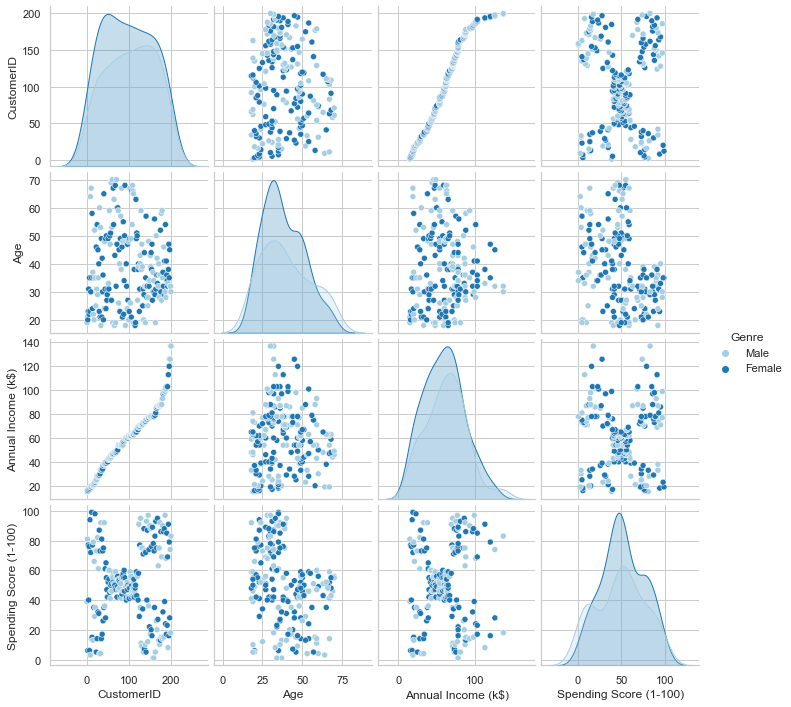

In [113]:
sns.pairplot(df, vars = ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'] ,hue='Genre', palette='Paired') 

A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. Quelle: https://pythonbasics.org/seaborn-pairplot/#:~:text=A%20pairplot%20plot%20a%20pairwise,axis%20across%20a%20single%20column.

***Single parameter analysis by genre***

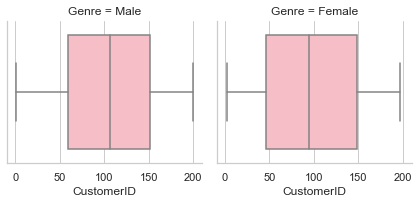

In [114]:
perimeter = sns.FacetGrid(df, col='Genre')
perimeter.map(sns.boxplot, 'CustomerID', order=['Male', 'Female'], color='lightpink')

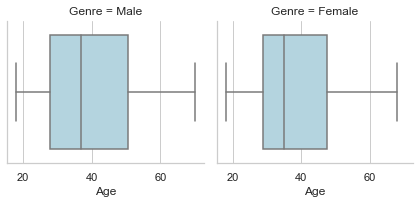

In [115]:
perimeter = sns.FacetGrid(df, col='Genre')
perimeter.map(sns.boxplot, 'Age', order=['Male', 'Female'], color='lightblue')

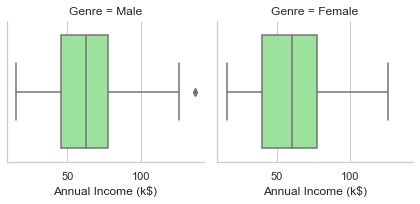

In [116]:
perimeter = sns.FacetGrid(df, col='Genre')
perimeter.map(sns.boxplot, 'Annual Income (k$)', order=['Male', 'Female'], color='lightgreen')

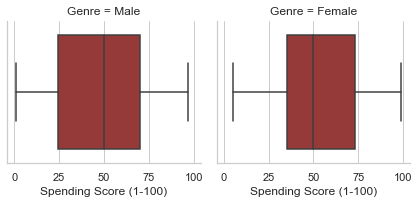

In [117]:
perimeter = sns.FacetGrid(df, col='Genre')
perimeter.map(sns.boxplot, 'Spending Score (1-100)', order=['Male', 'Female'], color='brown')

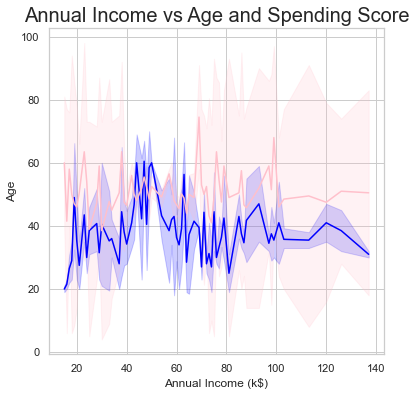

In [118]:
x = df['Annual Income (k$)']
y = df['Age']
z = df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()


The above Plot Between Annual Income and Age represented by a blue color line, and a plot between Annual Income and the Spending Score represented by a pink color. shows how Age and Spending Score varies with Annual Income.

### 3. Clustering Methode 

#### 3.1 K-means

In [119]:
from sklearn.cluster import KMeans
X=df.iloc[:,[3,4]].values

In [120]:
feature = df.drop(columns='CustomerID')
feature.loc[feature['Genre']=='Male','Genre']=0
feature.loc[feature['Genre']=='Female','Genre']=1

K-Means algorithm is a calculation method that can be used for grouping
objects, the so-called cluster analysis.

## Elbow Method

We will use the elbow method to check the optimal number of clusters.

In [121]:
inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(feature)
    inertias.append(km.inertia_)

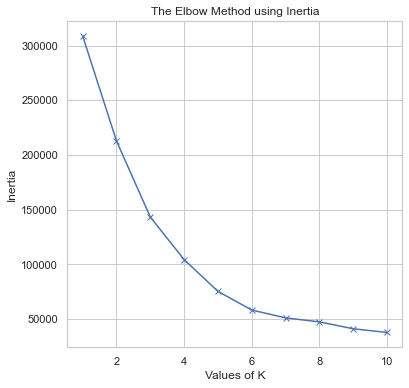

In [122]:
plt.plot(range(1, 11), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [123]:
inertias

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104422.83498539754,
 75399.61541401486,
 58348.64136331505,
 51165.18423710792,
 47513.36318380621,
 41221.9218115218,
 37832.76712662338]

We can see that 5 is the optimal number of K.

## Modelling

We can check if n = 3,4,5 is optimal.

Text(0.5, 1.0, 'Customer segmentation by 3 groups')

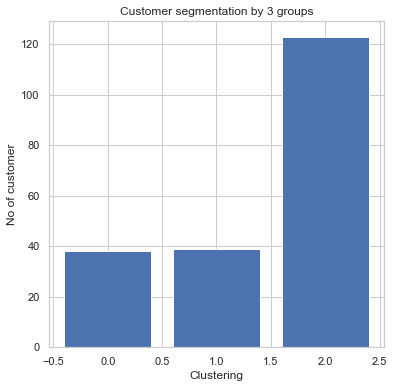

In [124]:

km = KMeans(n_clusters=3).fit(feature)
y_km = km.fit_predict(feature)
n_cluster, km_count = np.unique(y_km, return_counts=True)
plt.bar(n_cluster, km_count)
plt.ylabel('No of customer')
plt.xlabel('Clustering')
plt.title('Customer segmentation by 3 groups')

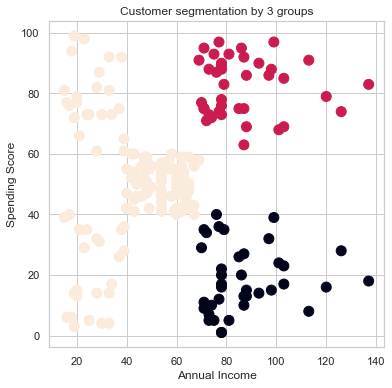

In [125]:
plt.scatter(df['Annual Income (k$)'], 
            df['Spending Score (1-100)'], 
            c=y_km, s=100)


plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer segmentation by 3 groups')

plt.show()

Text(0.5, 1.0, 'Customer segmentation by 4 groups')

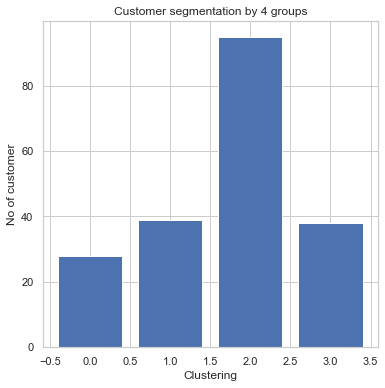

In [126]:
km = KMeans(n_clusters=4).fit(feature)
y_km = km.fit_predict(feature)
n_cluster, km_count = np.unique(y_km, return_counts=True)
plt.bar(n_cluster, km_count)
plt.ylabel('No of customer')
plt.xlabel('Clustering')
plt.title('Customer segmentation by 4 groups')

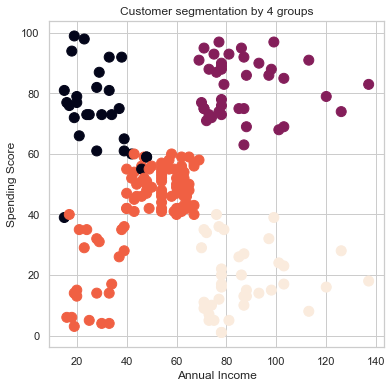

In [127]:
plt.scatter(df['Annual Income (k$)'], 
            df['Spending Score (1-100)'], 
            c=y_km, s=100)


plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer segmentation by 4 groups')

plt.show()

As can be seen, n=3.4 is still not optimal

Text(0.5, 1.0, 'Customer segmentation by 5 groups')

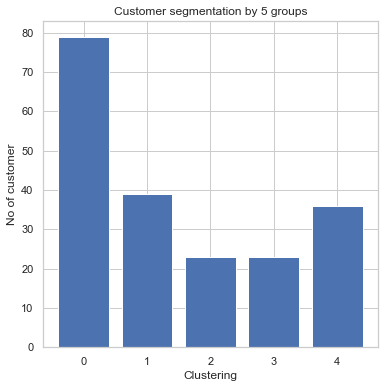

In [128]:
# 5 clusterings
# No of customers in each group respectively
km = KMeans(n_clusters=5).fit(feature)
y_km = km.fit_predict(feature)
n_cluster, km_count = np.unique(y_km, return_counts=True)
plt.bar(n_cluster, km_count)
plt.ylabel('No of customer')
plt.xlabel('Clustering')
plt.title('Customer segmentation by 5 groups')

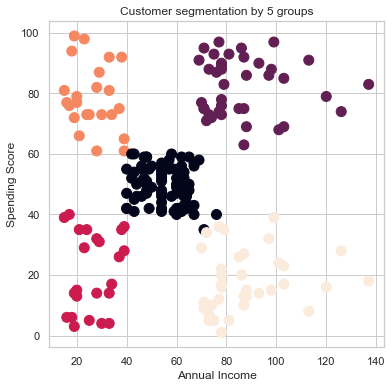

In [129]:
plt.scatter(df['Annual Income (k$)'], 
            df['Spending Score (1-100)'], 
            c=y_km, s=100)


plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer segmentation by 5 groups')

plt.show()

We will show the Centroid for each cluster.

In [130]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_km = km.fit_predict(X)

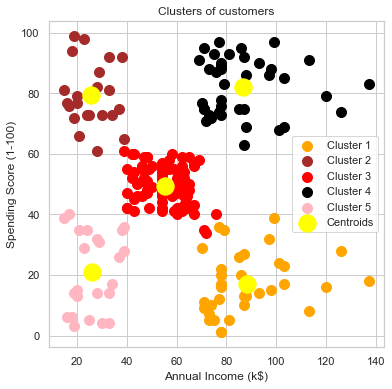

In [131]:
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s = 100, c = 'orange', label = 'Cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s = 100, c = 'brown', label = 'Cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s = 100, c = 'red', label = 'Cluster 3')
plt.scatter(X[y_km == 3, 0], X[y_km == 3, 1], s = 100, c = 'black', label = 'Cluster 4')
plt.scatter(X[y_km == 4, 0], X[y_km == 4, 1], s = 100, c = 'lightpink', label = 'Cluster 5')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

• Cluster 1: The customers have average annual income as well as average spending score.\
• Cluster 2:The customers have lower spending score but have a high annual income.\
• Cluster 3:The customers have lower annual income and lower spending score.\
• Cluster 4: The customers with lower annual income but higher spending score.\
• Cluster 5: The customers have both higher annual income and higher spending
score